In [1]:
import sys
import time
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import eBeam_v02 as eBeam2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.integrate import simps
c = SI.lightSpeed;

In [2]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2); 
en = 5.3e-6; 
beta_s = np.linspace(.05, 1.5, 100);
sigma_z = 5e-6; 
sigma_t = sigma_z / (beta * c); 
Q = 1.5e-9;

beamParams = {
              'gamma'   : gamma,  
              'sigma_z' : sigma_z, 
              'sigma_t' : sigma_t, 
              'beta'    : beta,
              'charge'  : Q, 
              'emitt'   : en, 
              'beta_s'  : beta_s
             }

eBeam2.get_sigma_r(beamParams)
pPk = eBeam2.peak_charge_dens(beamParams)
r, xi, npoints = eBeam2.get_pos(beamParams, nxi = 5, npoints = 1000);
pos = {'r' : r, 'xi' : xi, 'npoints' : npoints}


In [3]:
Er, rPeak, EPeak = eBeam2.rad_E_field(pos, beamParams)

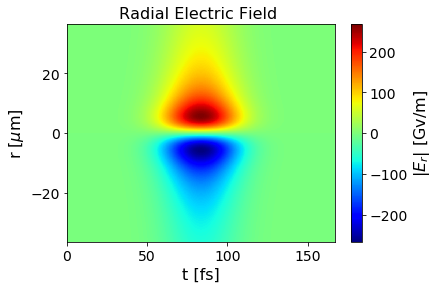

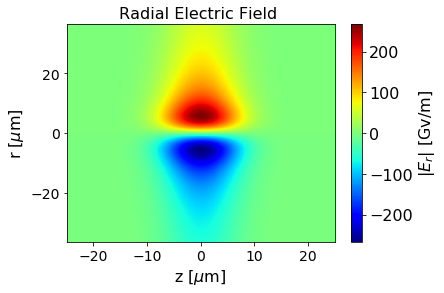

In [4]:
eBeam2.plot_field(Er, pos, beamParams, '$|E_r|$ [Gv/m]', beta_s, 0, fs = 16)

In [5]:
W_Ar1 = eBeam2.ionization_rate(Er, beamParams, 'Ar+')
W_Ar2 = eBeam2.ionization_rate(Er, beamParams, 'Ar2+')
W_He1 = eBeam2.ionization_rate(Er, beamParams, 'He+')
W_He2 = eBeam2.ionization_rate(Er, beamParams, 'He2+')

Beta = 0.05m


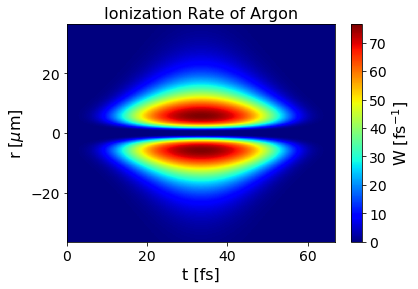

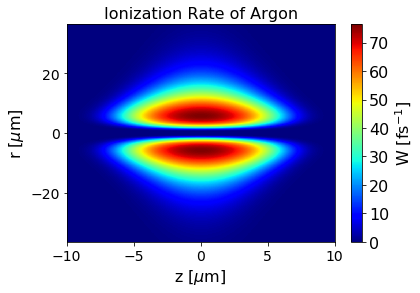

In [7]:
eBeam2.plot_field(W_Ar1, pos, beamParams, 'W [fs$^{-1}$]', beta_s, 0,\
                  fs = 16, gas = True, gasName = 'Argon')

In [6]:
ion_frac_Ar1, max_ion_Ar1 = eBeam2.ionization_frac(W_Ar1, pos, beamParams)
ion_frac_Ar2, max_ion_Ar2 = eBeam2.ionization_frac(W_Ar2, pos, beamParams)
ion_frac_He1, max_ion_He1 = eBeam2.ionization_frac(W_He1, pos, beamParams)
ion_frac_He2, max_ion_He2 = eBeam2.ionization_frac(W_He2, pos, beamParams)

In [7]:
max_frac = [max_ion_Ar1, max_ion_Ar2, max_ion_He1, max_ion_He2]
plasmaNames = ['Ar+', 'Ar2+', 'He+', 'He2+']


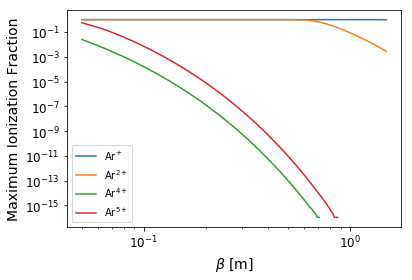

In [10]:
eBeam2.plot_max_frac(max_frac, beamParams, plasmaNames, fs = 14, log = True)

In [11]:
sigma_r = beamParams['sigma_r'][0]*1e6
sigma_z = beamParams['sigma_z']*1e6

In [5]:
# Maximum ionazation rate for a given beta (facet II) varying sigma_z
sigma_zz = np.linspace(5e-6, 20e-6, 100);
sigma_rz = 5e-6;
sigma_tz = sigma_z / (beta * c); 
bp = {'sigma_r': sigma_rz, 'sigma_z':sigma_zz, 'sigma_t':sigma_t,
      'charge':Q, 'beta':beta
     }
rz = np.linspace(-10*sigma_rz, 10*sigma_rz, 1000)
xiz = np.zeros((len(sigma_zz), 1000))
for i in range(len(sigma_zz)):
    xiz[i][:] = np.linspace(-2*sigma_zz[i], 2*sigma_zz[i], 1000)
p = {'r':rz, 'xi':xiz}
Erz, rzPeak, EzPeak = eBeam2.rad_E_field__sigma_z(p, bp)

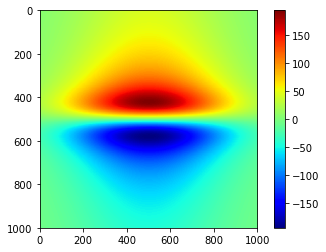

In [10]:
plt.imshow((np.flipud(Erz[0])), cmap = 'jet')
cbar = plt.colorbar()
plt.show()

In [12]:
sigma_zz[0]

5.0000000000000004e-06